In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


nInst = 50  # number of instruments (stocks)
currentPos = np.zeros(nInst)

In [4]:
def loadPrices(fn):
    global nt, nInst
    df = pd.read_csv(fn, sep="\s+", header=None, index_col=None)
    (nt, nInst) = df.shape
    return (df.values).T


pricesFile = "./prices.txt"
prcAll = loadPrices(pricesFile)

prcHist = pd.DataFrame(prcAll.T)

variance = prcHist.var()
stdev = np.sqrt(variance)

trainHist = prcHist.iloc[:751, :]



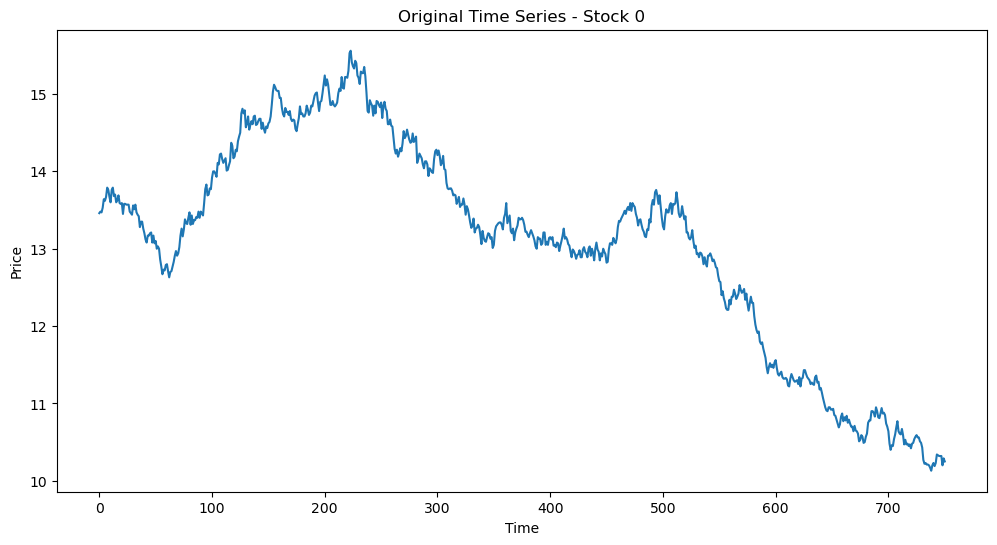

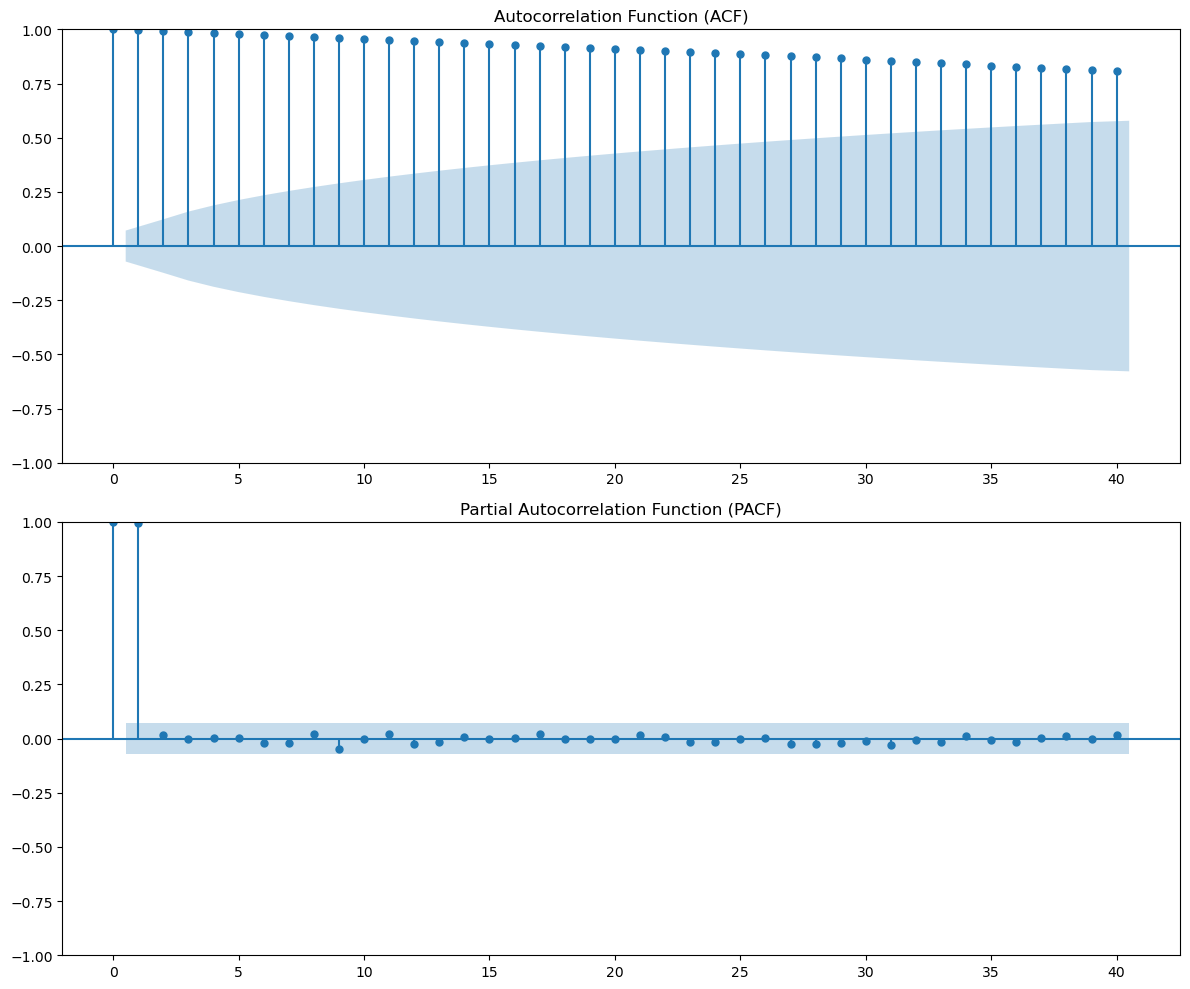

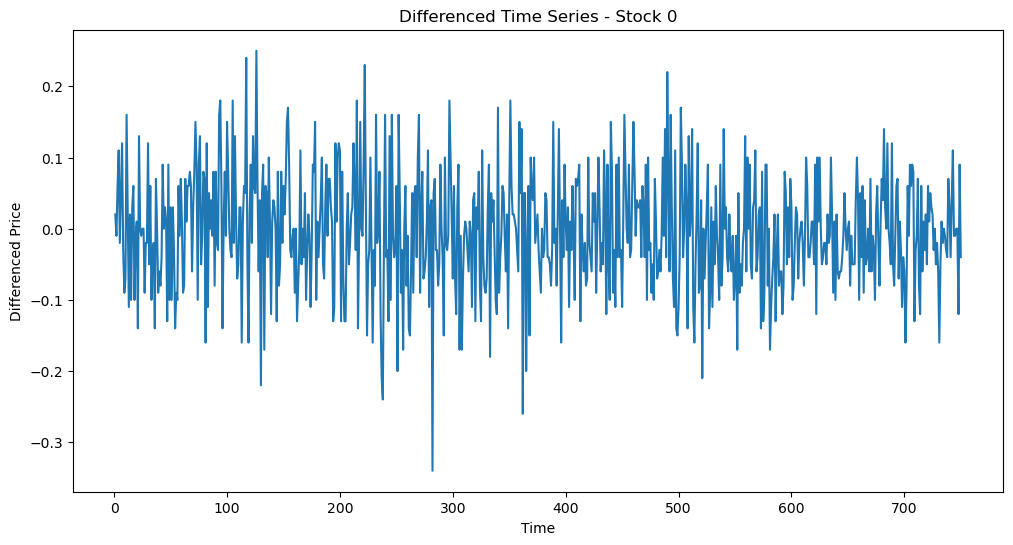

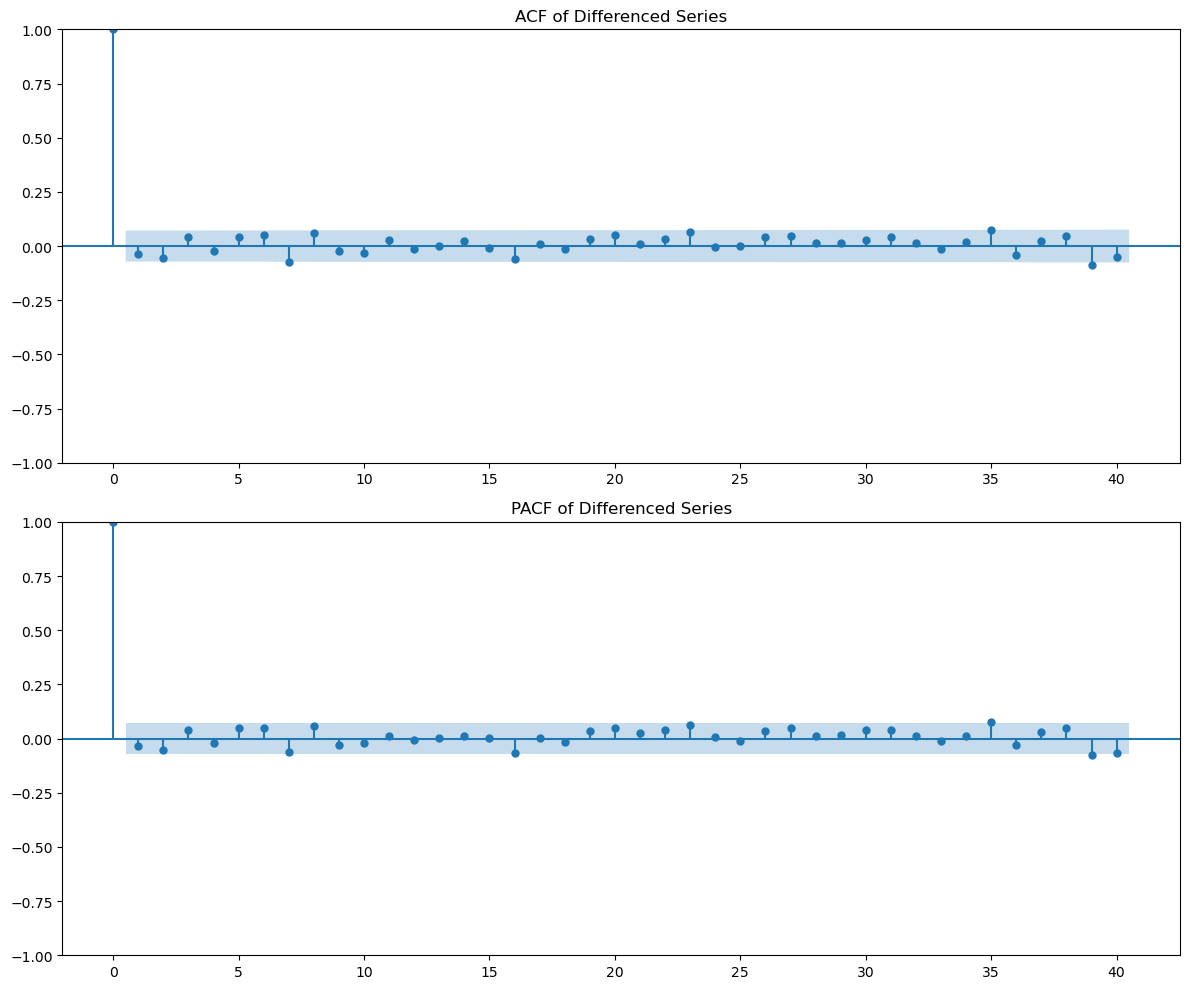

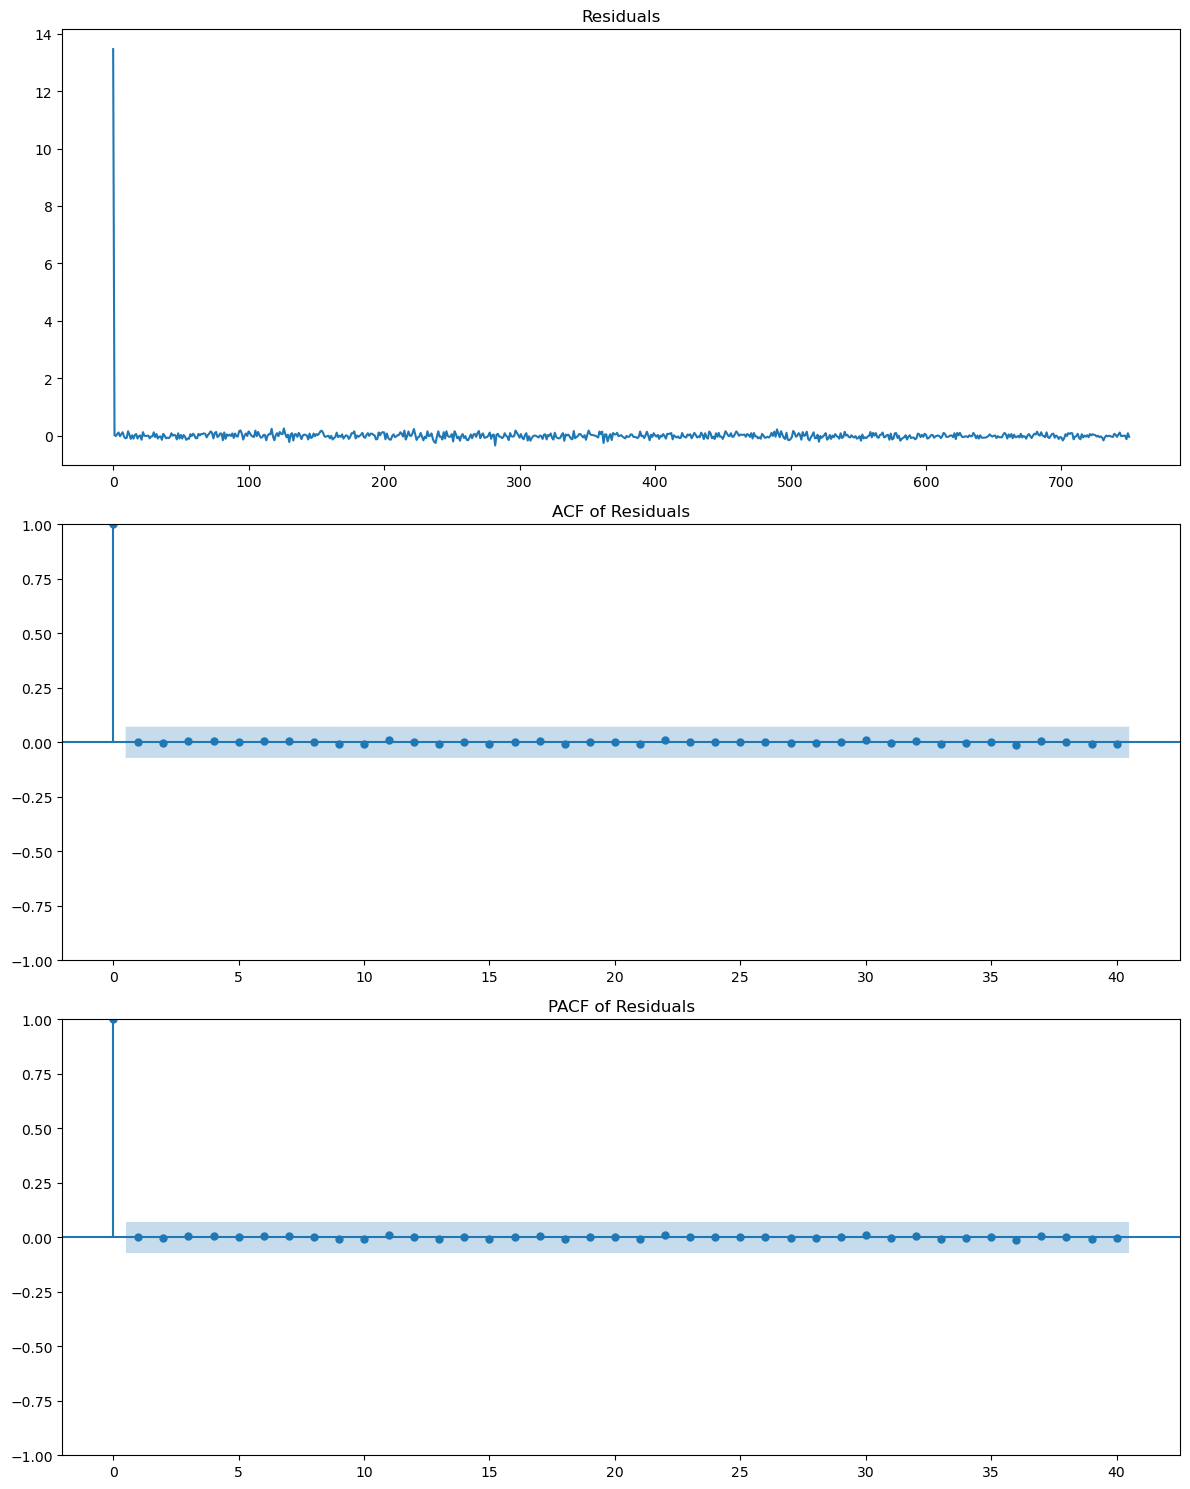

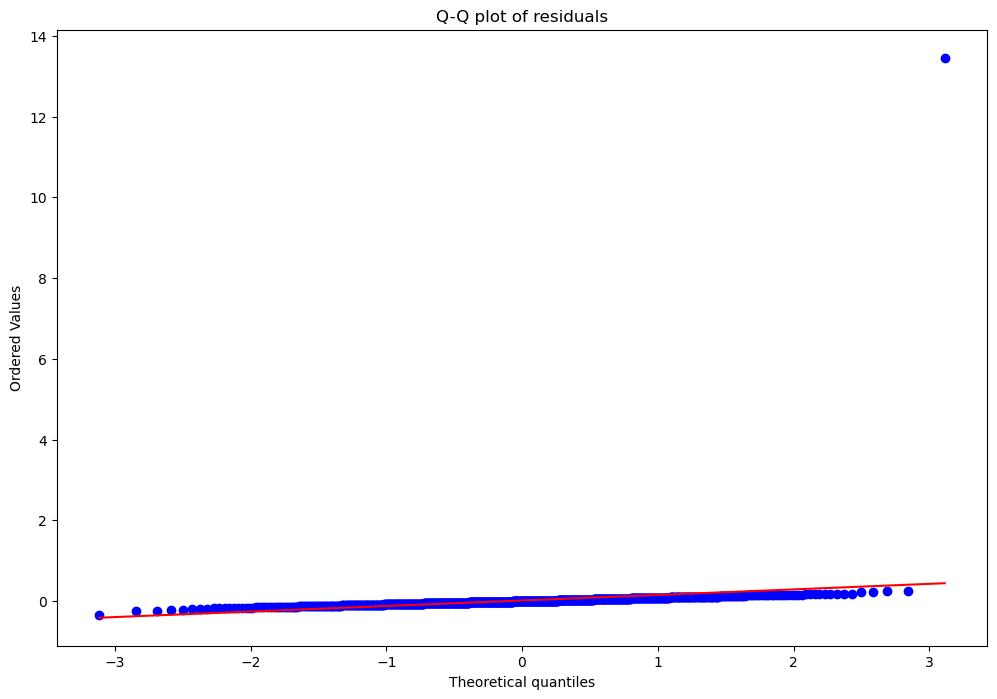

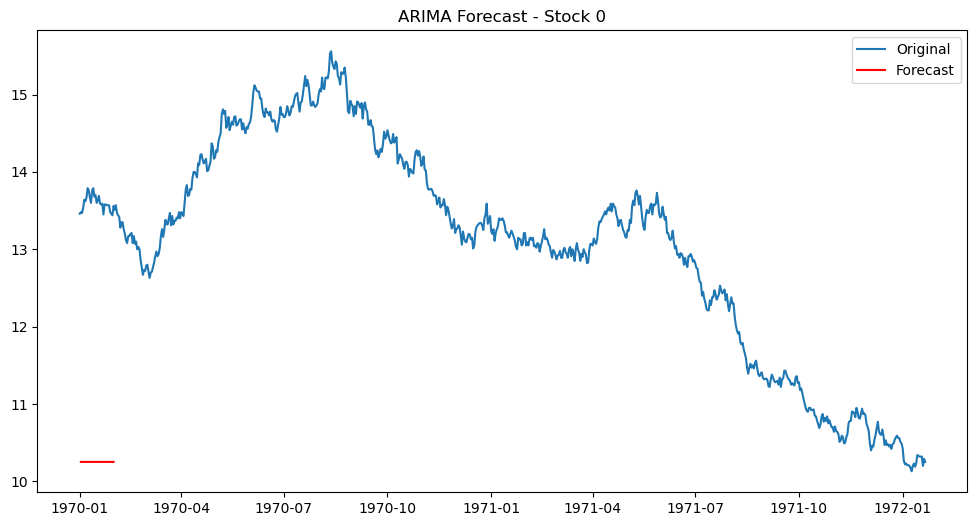

In [8]:
# Extract stock 0 data
stock_0 = trainHist.iloc[:, 0]

# 1. Original Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(stock_0)
plt.title("Original Time Series - Stock 0")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

# 2. ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(stock_0, ax=ax1, lags=40)
ax1.set_title("Autocorrelation Function (ACF)")
plot_pacf(stock_0, ax=ax2, lags=40)
ax2.set_title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

# 3. Differenced Series (if needed)
stock_0_diff = stock_0.diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(stock_0_diff)
plt.title("Differenced Time Series - Stock 0")
plt.xlabel("Time")
plt.ylabel("Differenced Price")
plt.show()

# 4. ACF and PACF of differenced series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(stock_0_diff, ax=ax1, lags=40)
ax1.set_title("ACF of Differenced Series")
plot_pacf(stock_0_diff, ax=ax2, lags=40)
ax2.set_title("PACF of Differenced Series")
plt.tight_layout()
plt.show()

# 5. Fit ARIMA model (example with ARIMA(1,1,1))
model = ARIMA(stock_0, order=(1, 1, 1))
results = model.fit()

# 6. Model diagnostics
residuals = results.resid
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
ax1.plot(residuals)
ax1.set_title("Residuals")
plot_acf(residuals, ax=ax2, lags=40)
ax2.set_title("ACF of Residuals")
plot_pacf(residuals, ax=ax3, lags=40)
ax3.set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

# 7. Q-Q plot of residuals
from scipy import stats

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q plot of residuals")
plt.show()

# 8. Forecast
forecast = results.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(stock_0, label="Original")
plt.plot(
    pd.date_range(start=stock_0.index[-1], periods=31, freq="D")[1:],
    forecast,
    color="red",
    label="Forecast",
)
plt.title("ARIMA Forecast - Stock 0")
plt.legend()
plt.show()